# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about a small component of data cleaning, which is data tidying. So, making sure that each variable is a column, each observation is a row, and each type of observation unit is a table will bring so closer to a tidy dataset. This structure makes it easy to tidy a messy dataset because it only requires a few simple tools.
2. The tidy standard is intended to accomplish a quick/simply cleaned dataset for initial exploration and data analysis. A standard essentially makes initial cleaning of data easy because you are following a structure.
3. The first sentence means that all datasets have some foundational similarities, but they all are slightly (or very) messy in a specific way. Having a standard allows a person to tidy any type of messy dataset to a specific standard. The second sentence is saying that it is easy to define what variables (height, age, weight) are and what the obervations (data points for different people) are in a dataset.
4. Wickham defines values as a collection of either numbers or strings. Each value corresponds to a variable and an observation. A variable contains all the values that measure the same attribute such as height or age. An observation contains all the values that are measured by the same unit such as values for a specific person or day.
5. In tidy data, each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
6. Common aspects of messy datasets includes - column headers are values, not variable names, mutliple variables are stored in one column, variables are stores in one column, variables are stored in both rows and columns, multiple tayps of obersational units are stored in the same table, a single observational unit is stored in multiple tables. Table 4 is messy because the values are column headers and the variables form both rows and columns. So, to fix table 4 we have to melt the dataset, which means to turn columns into rows.
7. Table 11 is messy because there are variables in individual columns (month, year) but there are also variables spread across columns (d1-d31). The element column is also a variable that stores variables (tmax, tmin). Table 12b is molten because, although it is tidy, the element column still contains variables. Table 12a is tidier because each observation (day) is its own row rather than split into two rows (one for tmax, one for tmin). There is also one variable for each column in table 12, so tmax and tmin are now columns.
8. The chicken and the egg problem is that a tidy data is only as useful as the tools that it works with, so tidy tools will be linked to tidy data. This leads to the issue where independently changing data structures or data tools will not improve the workflow. Wickham hopes that in the future others build upon the tidy data framework to develop better storage strategies as well as tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [19]:
# method to that returns the number of NaN values for each column
def countNan(df):
  nan_details = df.isnull().sum()
  total_nan = 0;
  for column, value in nan_details.items():
    if (value != 0):
      print(column, value)
      total_nan += value;
  print("Total NaN: ", total_nan)

In [20]:
# 1)
import numpy as np
import pandas as pd

df = pd.read_csv('./airbnb_hw.csv',low_memory=False)
df.dtypes

# Price is an object, so need to make it to a numeric since it is a continuous variable
# First need to get rid of the commas that are in the strings for Price such as 1,000
df['Price'] = df['Price'].str.replace(',', '')
df['Price'].unique()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Zipcode is categorical, so change it from a float to an object so that we don't do fillna on this column too
df['Zipcode'] = df['Zipcode'].astype('category')

# check Nan, and fill in the numerical variables with the mean of each column
# This way we can preserve some of our dataset rows rather than deleting a whole column/row
countNan(df)
df = df.fillna(df.mean(axis=0));
print("-- After --")
countNan(df)

Host Since 3
Property Type 3
Review Scores Rating (bin) 8323
Zipcode 134
Beds 85
Review Scores Rating 8323
Total NaN:  16871
-- After --
Host Since 3
Property Type 3
Zipcode 134
Total NaN:  140


<ipython-input-20-f0e632f40385>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean(axis=0));


In [31]:
# 2)
sharks = pd.read_csv('./sharks.csv',low_memory=False)
# sharks['Type'].value_counts()

# replace boating, boatomg, and boat with watercraft since boats are watercrafts and can go under that category
# this way can remove one of the categories and make it cleaner
sharks['Type'] = sharks['Type'].replace('Boat', 'Watercraft')
sharks['Type'] = sharks['Type'].replace('Boating', 'Watercraft')
sharks['Type'] = sharks['Type'].replace('Boatomg', 'Watercraft')

# Categorizing Questionable, Unconfirmed, Unverified, and Under investigation together since they all have a
# similar meaning which is 'unconfirmed'
sharks['Type'] = sharks['Type'].replace('Questionable', 'Unconfirmed')
sharks['Type'] = sharks['Type'].replace('Unverified', 'Unconfirmed')
sharks['Type'] = sharks['Type'].replace('Under investigation', 'Unconfirmed')

# Will also place NaN values into the Unconfirmed category since no one knows what the type of attack was
sharks['Type'].fillna('Unconfirmed', inplace=True)

# Did not combine unconfirmed and invalid because invalid means did not happen, unconfirmed means unsure about
# what happened
sharks['Type'].value_counts()

Unprovoked      4716
Provoked         593
Invalid          552
Watercraft       344
Sea Disaster     239
Unconfirmed       18
Name: Type, dtype: int64

In [22]:
# 3)
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
trial = pd.read_csv(url,low_memory=False)

In [24]:
trial = trial.rename(columns = {'WhetherDefendantWasReleasedPretrial' : 'released'})
trial['released'].value_counts()

# Replace 9 with NaN because in the codebook, 9 means unclear
# We want to make it clear that 9 means NaN so that we don't have to remember what 9 denotes
trial['released'] = trial['released'].replace(9, np.nan)

In [28]:
# 4)
# rename columns for ease of use
trial = trial.rename(columns = {'ImposedSentenceAllChargeInContactEvent' : 'imposed_sentence',
                                'SentenceTypeAllChargesAtConvictionInContactEvent' : 'sentence_type'})

# replace all ' ' with NaN to indicate that it is not a defined values, rather than just an empty string
trial['imposed_sentence'].replace(' ', np.nan, inplace=True)

# make imposed_sentence numerical because it is numbers that are not within categories
trial['imposed_sentence'] = pd.to_numeric(trial['imposed_sentence'], errors='coerce')

# replaced all of the sentence_types that are 4 to be 0 because they essentially mean the same thing
# since charges dismissed is equivalent to no incarceration
trial['sentence_type'] = trial['sentence_type'].replace(4, 0)

# Now, will replace all the imposed_sentence month values to coordinate accurately with sentence_type
# First, the sentency_type 0 has no incarceration/probation, so the imposed_sentence should be 0 months
# I am assuming that imposed_sentence is just for incareration periods, which does not include probation
trial.loc[trial['sentence_type'] == 0, 'imposed_sentence'] = 0

# fixing the imposed_sentence to be 12 if sentence_type is 1 and the imposed_sentence is greater than 12
# This is because sentence_type of 1 means incarceration of 12 or less months
trial.loc[(trial['sentence_type'] == 1) & (trial['imposed_sentence'] > 12), 'imposed_sentence'] = 12

trial_cols = trial[['imposed_sentence','sentence_type']]
trial_cols.head(1000)

,imposed_sentence,sentence_type
0,NaN,9
1,0.000000,0
2,12.000000,1
3,0.985626,1
4,0.000000,0
...,...,...
995,12.000000,2
996,60.000000,2
997,6.000000,1
998,480.000000,2


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
# What are are the dimensions of the data? How many observations are there?
# What are the variables included? Use .head() to examine the first few rows of data.

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print(df.dtypes)
df.head()

Rows: 30478
Columns: 13
Host Id                          int64
Host Since                      object
Name                            object
Neighbourhood                   object
Property Type                   object
Review Scores Rating (bin)     float64
Room Type                       object
Zipcode                       category
Beds                           float64
Number of Records                int64
Number Of Reviews                int64
Price                            int64
Review Scores Rating           float64
dtype: object


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,90.738659,Entire home/apt,11249.0,1.0,1,0,145,91.99323
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,90.738659,Private room,11206.0,1.0,1,1,37,91.99323
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,90.738659,Private room,10032.0,1.0,1,1,28,91.99323
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,90.738659,Entire home/apt,10024.0,3.0,1,0,199,91.99323
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.000000,Private room,10036.0,3.0,1,39,549,96.00000


In [ ]:
# Cross tabulate Room Type and Property Type.
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

The airbnb dataset has the most number of apartment listings compared to any other property type. Furthermore, most property types have private rooms, and then some have entire home/apt, and there are typically few to non shared room options. Private rooms are most common for houses and bed & breakfast places while entire home/apt is more popular for apartments and townhouses. The pattern seems to be that the larger a place (castle, house, chalet) is the more likely it is that they will offer private rooms rather than the entire place.

<Axes: xlabel='Price', ylabel='Count'>

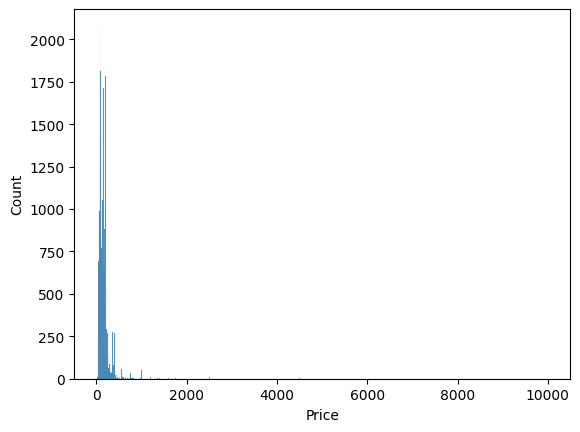

In [ ]:
import seaborn as sns
# histogram, kernel density, box plot, and a statistical description of the variable
var = 'Price'
# histogram
sns.histplot(df[var])

<Axes: xlabel='Price', ylabel='Density'>

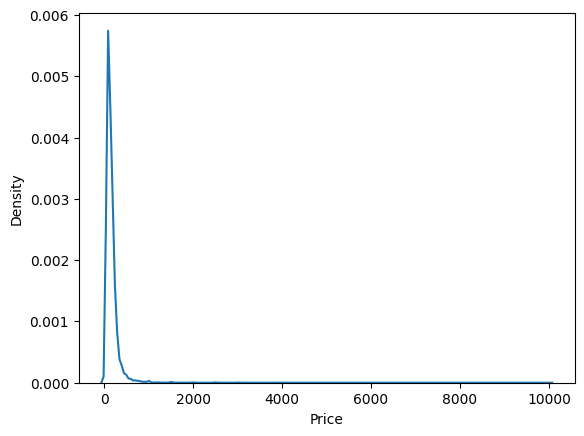

In [ ]:
# kernel
sns.kdeplot(df[var])

<Axes: xlabel='Price'>

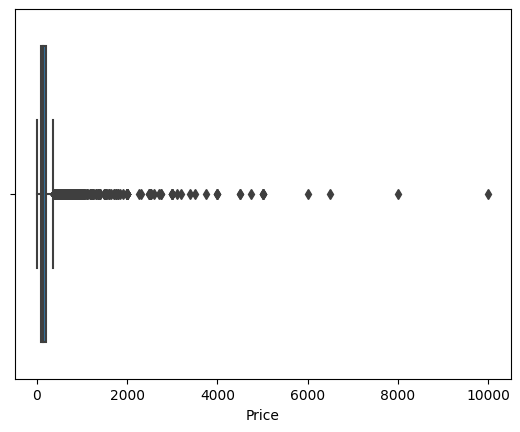

In [ ]:
# boxplot
sns.boxplot(data=df, x=var)

In [ ]:
df['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

The data is badly scaled because the 'Price' column has a very long tail. Essentially, there are a few large outliers in the dataset and in this case it is the price values of 8000 and 10000.

<Axes: xlabel='price_log', ylabel='Count'>

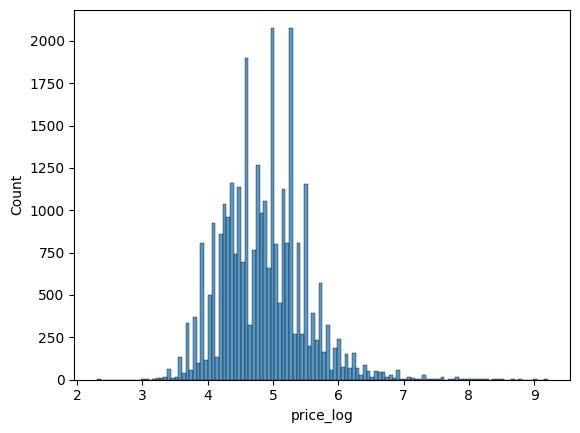

In [ ]:
# take log of Price column and replot
df['price_log'] = np.log(df['Price'])

# log histogram
sns.histplot(df['price_log'])

<Axes: xlabel='price_log', ylabel='Density'>

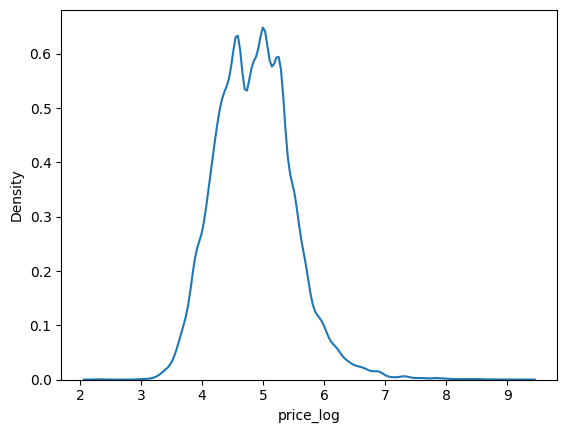

In [ ]:
# log kernel density
sns.kdeplot(df['price_log'])

<Axes: xlabel='price_log'>

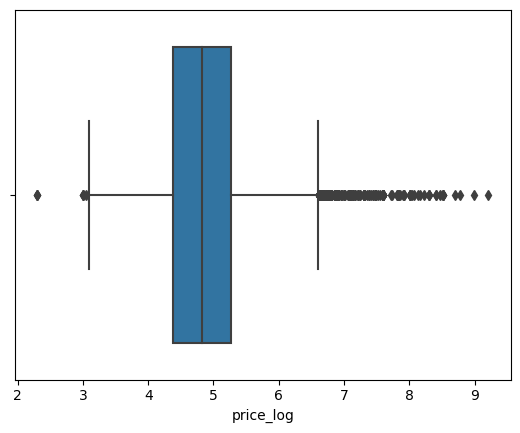

In [ ]:
# log boxplot
sns.boxplot(data=df, x='price_log')

In [ ]:
# log statistical descriptions
df['price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64

Price                                                           \
             count         mean          std    min     25%    50%      75%   
Beds                                                                          
0.000000       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.000000   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
1.530089      85.0   211.552941   372.808533   40.0   80.00  123.0   180.00   
2.000000    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.000000    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.000000     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.000000     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.000000     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.000000      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.000000      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.000000      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.000000     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.000000      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.000000      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.000000     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

                    
               max  
Beds                
0.000000     119.0  
1.000000    4000.0  
1.530089    3000.0  
2.000000   10000.0  
3.000000    5000.0  
4.000000    6500.0  
5.000000    8000.0  
6.000000    2750.0  
7.000000     900.0  
8.000000    4000.0  
9.000000    1050.0  
10.000000   1050.0  
11.000000   1350.0  
12.000000   5000.0  
16.000000   1500.0

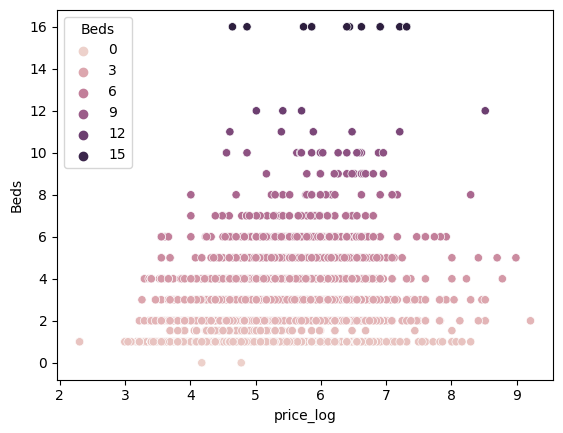

In [ ]:
# Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption
# of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price
# and standard deviation in prices.
sns.scatterplot(data=df,x='price_log', y='Beds', hue='Beds')
var = 'Price'
group = 'Beds'
df.loc[:,[group,var]].groupby(group).describe()

As the mean increases, the standard deviation also increases, meaning that if a the mean price is larger, there is a larger variation in data points. Furthermore, a smaller number of bedrooms has shown to have a wider range of prices based on the graph above.

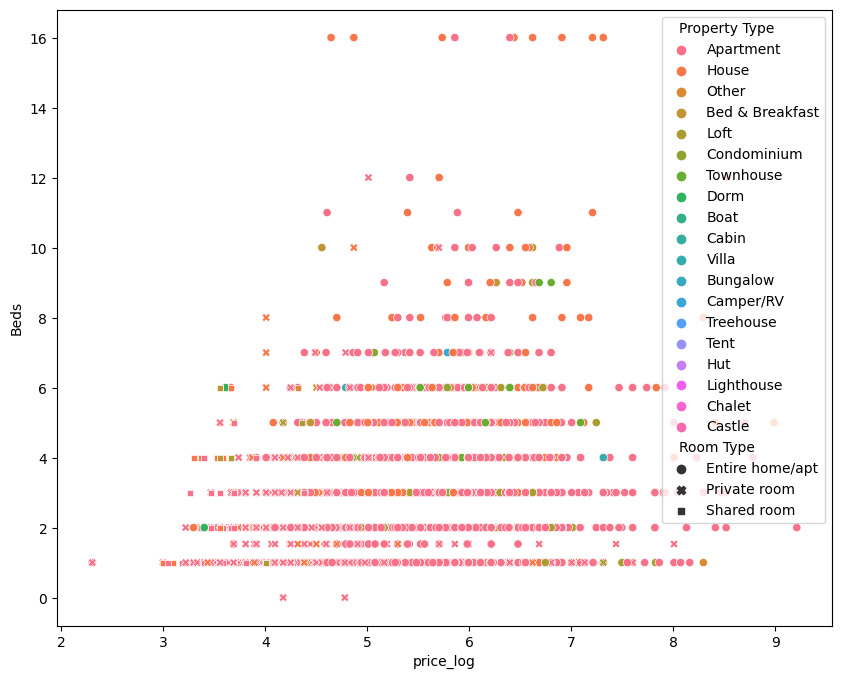

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

In [ ]:
# Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns
# do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and
# Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean
# or median appear to be a more reliable estimate of central tendency, and explain why?
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df,x='price_log', y='Beds', hue='Property Type', style='Room Type')
plt.show()

price_description = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(price_description)

Some patterns I noticed are that the mean price for a private room is typically cheaper than the mean price for the entire place especially when looking at property types such as apartments, bed & breakfasts, cabins, houses, etc. Furthermore, based on the graph, private rooms tend to be on the lower end of price range while entire apts/space tends to be more spread out having a range of cheap to expensive prices. There are few shared room options, making them hard to decipher on the graph, but the shared rooms are typically cheaper than private rooms, with a few exceptions.

The airbnb option with the greatest mean and standard deviation is the property type 'Other' and with room type as 'Entire home/apt.' But, mean might not be the best indicator for the typical prices of these properties because a few of them have large outliers that cause the mean to be much higher than supposed. For example, the apartments with room type as 'Entire home/apt' have housing prices that range from 10.00 to 10000.00 dollars. Hence, median would be a better measurement of central tendency since it is less affected by outlier values.

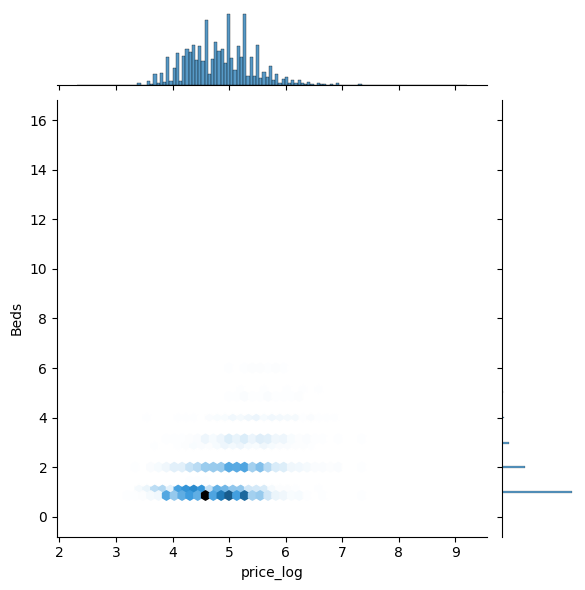

In [ ]:
# We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex.
# Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

sns.jointplot(x='price_log',y='Beds',data=df,kind='hex')

The data is actually much more uniformly distributed in terms of price than I had expected. In plots 5 & 6, the data was more spreadout and you couldn't see much correlation by looking at the graphs. It just seemed like many housing options had a wide range of prices. But, in the above, I can see that the price of airbnbs is more centralized at price_log 5 and most places have a number of bedrooms that sits at 0-2. With just looking at 5 & 6, I had thought that the prices varied very widely, but now with the above graph it emphasis the distribution a lot more.

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.